# Import libs

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from data_load import MnistDataset
from torch.utils.data import DataLoader
import torch
import cv2
import matplotlib.pyplot as plt

# Load model and dataset

In [19]:
checkpoint = torch.load(
    '../saved_models/lenet5_yanjiali_01_01_18.pt', map_location='cpu')

val_dataset = MnistDataset(
    images_path='../dataset/t10k-images-idx3-ubyte',
    labels_path='../dataset/t10k-labels-idx1-ubyte',
    mean=[0.1307],
    std=[0.3081],
)

val_loader = DataLoader(
    val_dataset,
    batch_size=64,
    shuffle=True,
    num_workers=0,
)

from models.lenet5 import LeNet5
net = LeNet5()
net.load_state_dict(checkpoint['model'])
net.eval()

LeNet5(
  (features): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (2): Sigmoid()
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (5): Sigmoid()
  )
  (classifier): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [20]:
loggers = checkpoint['loggers']

train_loss = loggers['train_loss']
val_loss = loggers['val_loss']
val_top1_acc = loggers['val_top1_acc']
val_top5_acc = loggers['val_top5_acc']

# loggers = {
#     'train_loss': train_loss,
#     'val_loss': {
#         'epochs': val_loss['epochs'],
#         'value': [i.item() for i in val_loss['value']],
#     },
#     'val_top1_acc': {
#         'epochs': val_top1_acc['epochs'],
#         'value': [i.item() for i in val_top1_acc['value']],
#     },
#     'val_top5_acc': {
#         'epochs': val_top5_acc['epochs'],
#         'value': [i.item() for i in val_top5_acc['value']],
#     }
# }

# torch.save({
#     'epoch': checkpoint['epoch'],
#     'model': checkpoint['model'],
#     'optimizer': checkpoint['optimizer'],
#     'scheduler': checkpoint['scheduler'],
#     'loggers': loggers,
# }, '../saved_models/lenet5_yanjiali_01_01_18.pt')

# Visualize training metrics

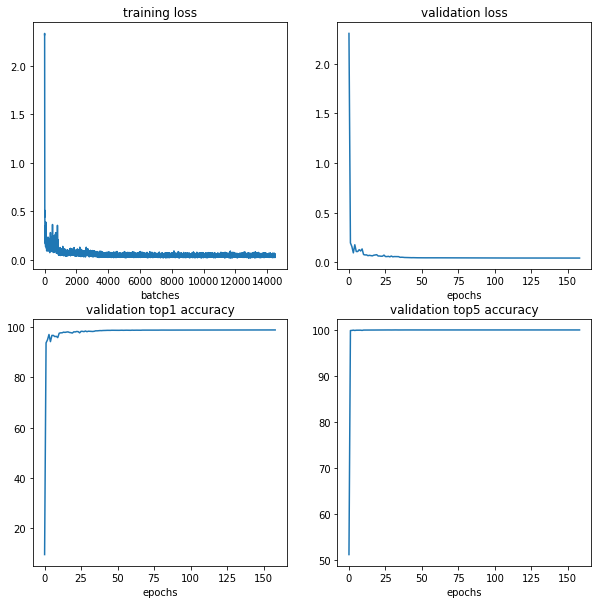

In [25]:
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.title('training loss')
plt.xlabel('batches')
plt.plot(train_loss['value'])

plt.subplot(2, 2, 2)
plt.title('validation loss')
plt.xlabel('epochs')
plt.plot(val_loss['value'])

plt.subplot(2, 2, 3)
plt.title('validation top1 accuracy')
plt.xlabel('epochs')
plt.plot(val_top1_acc['value'])

plt.subplot(2, 2, 4)
plt.title('validation top5 accuracy')
plt.xlabel('epochs')
plt.plot(val_top5_acc['value'])

# Visualize model output

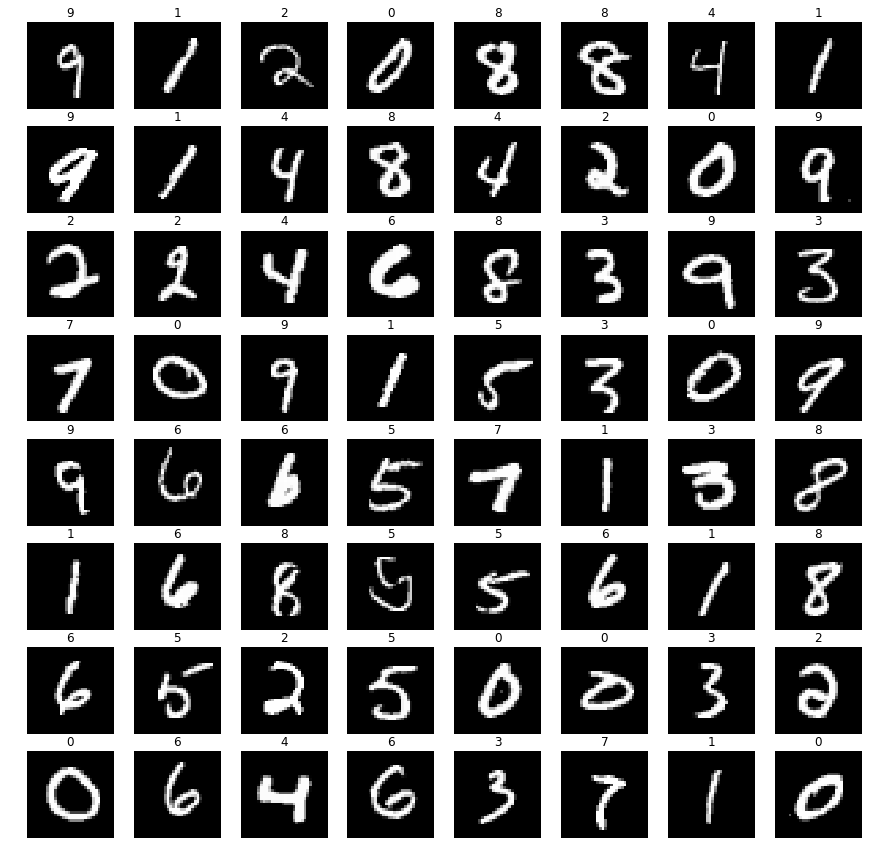

In [3]:
it = iter(val_loader)
data = next(it)

plt.figure(figsize=(15,15))

for i in range(8):
    for j in range(8):
        idx = i * 8 + j
        plt.subplot(8, 8, idx + 1)
        img = data['image'][idx].squeeze().numpy()
        digit = data['label'][idx].item()
        plt.axis('off')
        plt.imshow(img, cmap='gray')
        plt.title(digit)
        plt.grid(True)